In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('total.csv')
rationales = df[['if_else', 'contrastive', 'neutral', 'consensus', 'causal', 'comparative', 'historical', 'ucs_score', 'wucs_score', 'consensus_wucs_score']]

In [84]:
results = pd.read_csv('results2.csv', index_col=0)

In [85]:
results

,IF - ELSE,Contrastive,Neutral,Consensus,Causal,Comparative,Historical,UCS,WUCS,CWUCS
ACCURACY,61.14,60.92,62.48,63.07,61.53,61.30,61.94,61.27,61.84,63.48
BASE,56.24,68.26,11.12,68.43,63.92,64.20,0.11,0.04,62.94,9.00
LARGE,29.87,70.20,40.98,74.01,69.84,71.21,36.18,66.32,57.20,6.00


In [93]:
results['Causal']['ACCURACY']

61.53

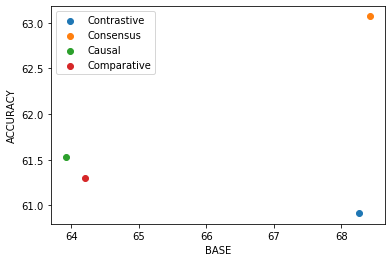

In [96]:
# plot all performance rationales greater than accuracy
columns = results.columns
for col in columns:
    if results[col]['BASE'] > results[col]['ACCURACY'] and results[col]['LARGE'] > results[col]['ACCURACY']:
        plt.scatter(results[col]['BASE'], results[col]['ACCURACY'], label=col)
plt.xlabel('BASE')
plt.ylabel('ACCURACY')
plt.legend()

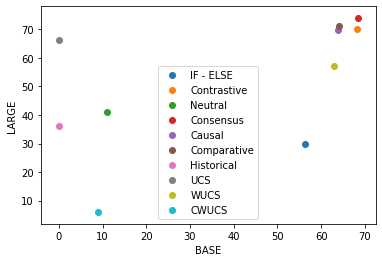

In [98]:
# PLOT PERFORMANCE RATIONALES LARGE AND BASE
columns = results.columns
for col in columns:
    plt.scatter(results[col]['BASE'], results[col]['LARGE'], label=col)

plt.xlabel('BASE')
plt.ylabel('LARGE')
plt.legend()

# Length analysis

In [102]:
# top 4 performance rationales
best_rationales = []
columns = results.columns
for col in columns:
    if results[col]['BASE'] > results[col]['ACCURACY'] and results[col]['LARGE'] > results[col]['ACCURACY']:
        best_rationales.append(col.lower())


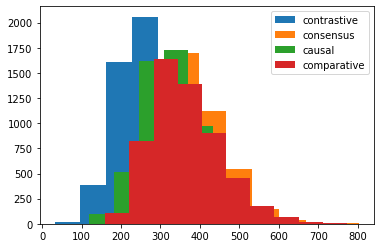

In [120]:
# plot length of top performance 
length_dict = {}
for rationale in best_rationales:
    
    length_dict[rationale] = rationales[rationale].str.len()
    
    plt.hist(length_dict[rationale], label=rationale)
plt.legend()


## Just mean length

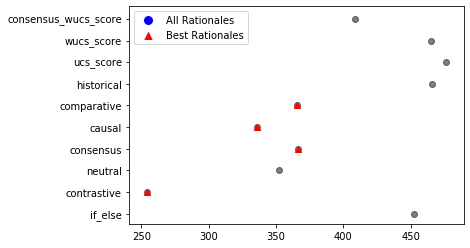

In [136]:
import matplotlib.pyplot as plt

# Assuming rationales and best_rationales are already defined

# First, plot all rationales
for rationale in rationales.columns:
    plt.scatter(rationales[rationale].str.len().mean(), rationale, label=rationale, color='black', alpha=0.5)

# Then, overlay the best rationales with a different color or marker
for rationale in best_rationales:
    plt.scatter(rationales[rationale].str.len().mean(), rationale, label=rationale, color='red', marker='^')

# Displaying a legend may be cluttered if there are many rationales, so consider simplifying or omitting it
# or you can create a custom legend to just show the two groups
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='All Rationales', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='^', color='w', label='Best Rationales', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()

## Unique mean length

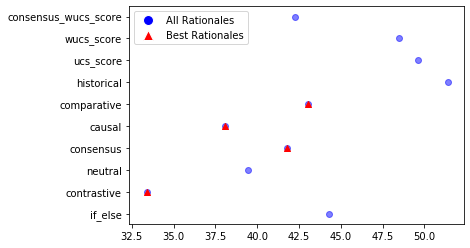

In [137]:
# Function to calculate the average length of unique words for each rationale
def avg_len_unique_words(rationale_series):
    def unique_words_len(text):
        # Split the text into words and get unique words
        unique_words = set(text.split())
        return len(unique_words)

    # Apply the function to each row and then take the mean
    return rationale_series.apply(unique_words_len).mean()

# First, plot all rationales
all_avg_lengths = [avg_len_unique_words(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)
plt.scatter(all_avg_lengths, all_labels, color='blue', alpha=0.5, label='All Rationales')

# Then, overlay the best rationales with a different color or marker
best_avg_lengths = [avg_len_unique_words(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales
plt.scatter(best_avg_lengths, best_labels, color='red', marker='^', label='Best Rationales')

# Create a custom legend to show the two groups
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='All Rationales', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='^', color='w', label='Best Rationales', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()

## Unique bigram 

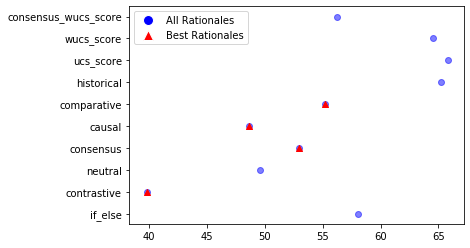

In [138]:
# Function to calculate the average count of unique bigrams for each rationale
def avg_unique_bigrams(rationale_series):
    def unique_bigrams_count(text):
        words = text.split()
        bigrams = {(words[i], words[i+1]) for i in range(len(words)-1)}
        return len(bigrams)

    # Apply the function to each row and then take the mean
    return rationale_series.apply(unique_bigrams_count).mean()

# First, plot all rationales
all_avg_bigrams = [avg_unique_bigrams(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)
plt.scatter(all_avg_bigrams, all_labels, color='blue', alpha=0.5, label='All Rationales')

# Then, overlay the best rationales with a different color or marker
best_avg_bigrams = [avg_unique_bigrams(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales
plt.scatter(best_avg_bigrams, best_labels, color='red', marker='^', label='Best Rationales')

# Create a custom legend to show the two groups
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='All Rationales', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='^', color='w', label='Best Rationales', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()

## unique trigram

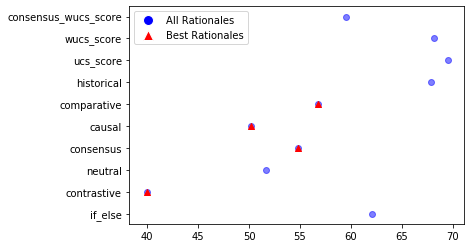

In [139]:
# Function to calculate the average count of unique trigrams for each rationale
def avg_unique_trigrams(rationale_series):
    def unique_trigrams_count(text):
        words = text.split()
        trigrams = {(words[i], words[i+1], words[i+2]) for i in range(len(words)-2)}
        return len(trigrams)

    # Apply the function to each row and then take the mean
    return rationale_series.apply(unique_trigrams_count).mean()

# First, plot all rationales
all_avg_trigrams = [avg_unique_trigrams(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)
plt.scatter(all_avg_trigrams, all_labels, color='blue', alpha=0.5, label='All Rationales')

# Then, overlay the best rationales with a different color or marker
best_avg_trigrams = [avg_unique_trigrams(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales
plt.scatter(best_avg_trigrams, best_labels, color='red', marker='^', label='Best Rationales')

# Create a custom legend to show the two groups
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='All Rationales', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='^', color='w', label='Best Rationales', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()

In [140]:
all_avg_bigrams

[58.05042918454936,
 39.8288626609442,
 49.61534334763949,
 52.92864806866953,
 48.6747138769671,
 55.19510014306152,
 65.21030042918454,
 65.86891988555078,
 64.52628755364807,
 56.197424892703864]

### Sentiment Score: Obtain a sentiment polarity score.

In [142]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


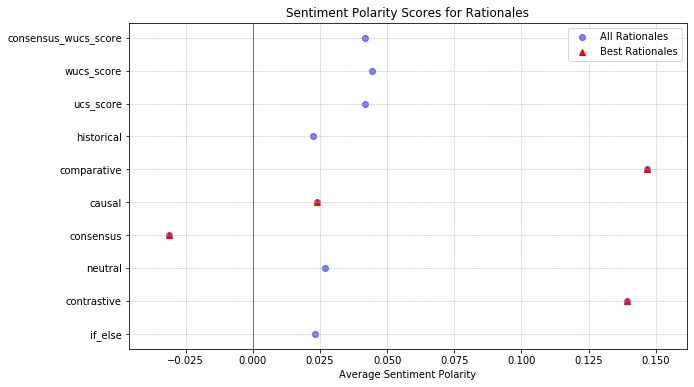

In [144]:
from textblob import TextBlob

# Function to get the sentiment score of a rationale series
def avg_sentiment(rationale_series):
    return rationale_series.apply(lambda text: TextBlob(text).sentiment.polarity).mean()

# Get sentiment scores for all rationales
all_avg_sentiments = [avg_sentiment(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)

# Get sentiment scores for best rationales
best_avg_sentiments = [avg_sentiment(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(all_avg_sentiments, all_labels, color='blue', alpha=0.5, label='All Rationales')
plt.scatter(best_avg_sentiments, best_labels, color='red', marker='^', label='Best Rationales')

plt.xlabel("Average Sentiment Polarity")
plt.title("Sentiment Polarity Scores for Rationales")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


### Lexical Diversity: Calculate the ratio of unique words to the total number of words

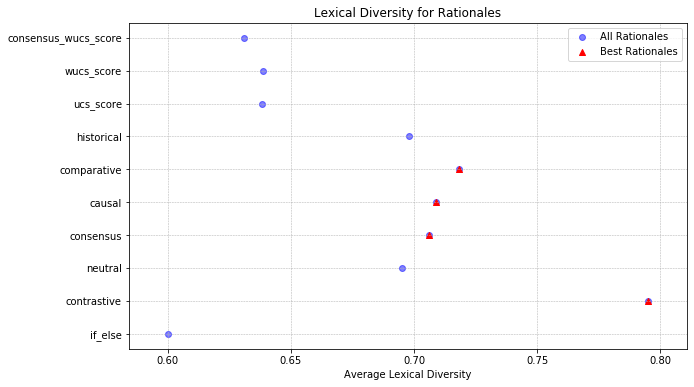

In [145]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

# Function to get the average lexical diversity of a rationale series
def avg_lexical_diversity(rationale_series):
    return rationale_series.apply(lexical_diversity).mean()

# Get lexical diversity scores for all rationales
all_avg_diversities = [avg_lexical_diversity(rationales[rationale]) for rationale in rationales.columns]
all_labels = list(rationales.columns)

# Get lexical diversity scores for best rationales
best_avg_diversities = [avg_lexical_diversity(rationales[rationale]) for rationale in best_rationales]
best_labels = best_rationales

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(all_avg_diversities, all_labels, color='blue', alpha=0.5, label='All Rationales')
plt.scatter(best_avg_diversities, best_labels, color='red', marker='^', label='Best Rationales')

plt.xlabel("Average Lexical Diversity")
plt.title("Lexical Diversity for Rationales")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Named Entity Recognition (NER): Identify the types and frequencies of entities mentioned (e.g., persons, organizations).

In [146]:
!pip install spacy
!python -m spacy download en_core_web_sm


Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/6c/94/6852af0a468b710a042876be3782183646525145b1d5e92a2c3e88b0acf2/spacy-3.7.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/f9/63/49e1eda3c610f49e5d3062e44ed27751f33ca8c4087b100b78b141201a6a/murmurhash-1.0.10-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/5f/70/b9945a7918d467c6c7112f6e20176d4f41

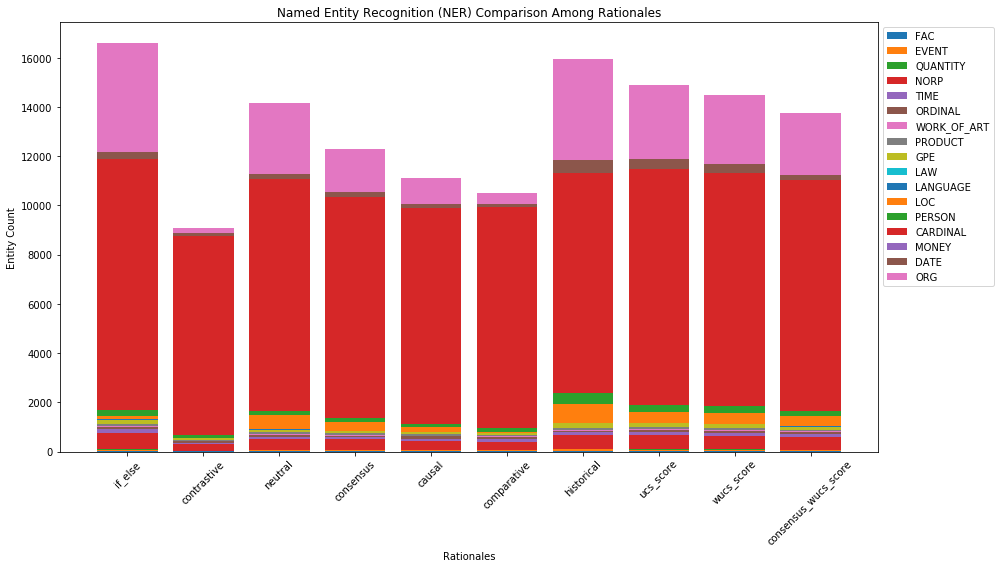

In [149]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Function to count the entities in a list of texts
def count_entities_in_texts(texts):
    entity_counts = Counter()
    
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):  # Only use NER, disable other pipelines for speed
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
            
    return entity_counts

# Store entity counts for each rationale
rationale_entity_counts = {}

for rationale in rationales.columns:
    rationale_texts = rationales[rationale].tolist()
    rationale_entity_counts[rationale] = count_entities_in_texts(rationale_texts)

# Visualization
entity_types = set(ent for counts in rationale_entity_counts.values() for ent in counts.keys())
rationale_labels = list(rationales.columns)

# Creating a 2D array to hold count data
data = np.zeros((len(entity_types), len(rationale_labels)))

for j, rationale in enumerate(rationale_labels):
    for i, entity in enumerate(entity_types):
        data[i, j] = rationale_entity_counts[rationale].get(entity, 0)

# Stacked bar chart
plt.figure(figsize=(14, 8))
bottoms = np.zeros(len(rationale_labels))
for i, entity in enumerate(entity_types):
    plt.bar(rationale_labels, data[i], bottom=bottoms, label=entity)
    bottoms += data[i]

plt.xlabel("Rationales")
plt.ylabel("Entity Count")
plt.title("Named Entity Recognition (NER) Comparison Among Rationales")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
plt.tight_layout()
plt.show()


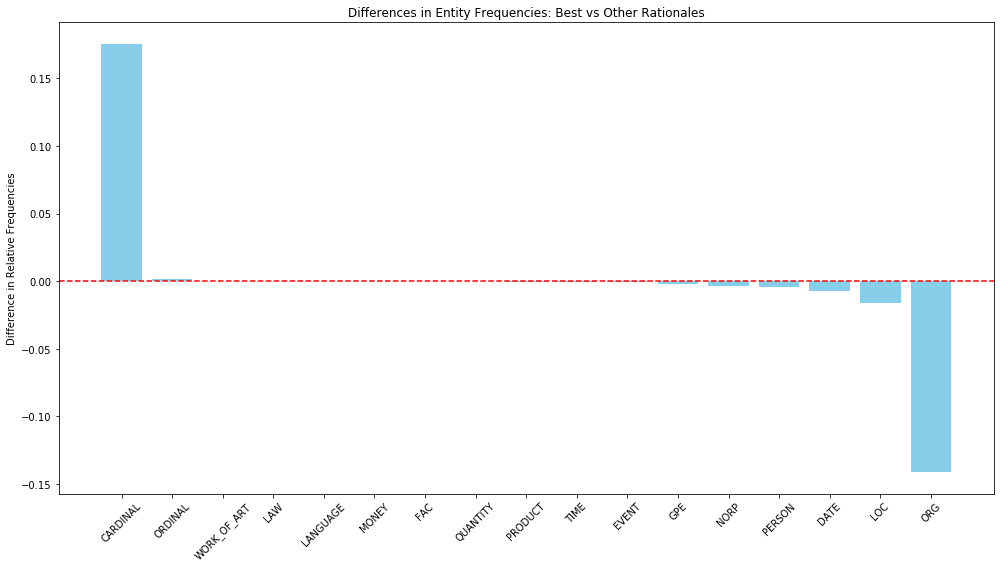

In [150]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Function to count the entities in a list of texts
def count_entities_in_texts(texts):
    entity_counts = Counter()
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):  # Efficiency
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
    return entity_counts

# Calculate entity frequencies for 'best rationales' and 'other rationales'
best_texts = [text for rationale in best_rationales for text in rationales[rationale].tolist()]
best_entity_counts = count_entities_in_texts(best_texts)
total_best = sum(best_entity_counts.values())

other_rationales = set(rationales.columns) - set(best_rationales)
other_texts = [text for rationale in other_rationales for text in rationales[rationale].tolist()]
other_entity_counts = count_entities_in_texts(other_texts)
total_other = sum(other_entity_counts.values())

# Normalize to get relative frequencies
best_frequencies = {entity: count / total_best for entity, count in best_entity_counts.items()}
other_frequencies = {entity: count / total_other for entity, count in other_entity_counts.items()}

# Entities to be considered in the comparison
all_entities = set(best_frequencies.keys()) | set(other_frequencies.keys())

# Plotting
differences = {entity: best_frequencies.get(entity, 0) - other_frequencies.get(entity, 0) for entity in all_entities}

sorted_diff = dict(sorted(differences.items(), key=lambda item: item[1], reverse=True))




/home/huy/miniconda3/envs/huy/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


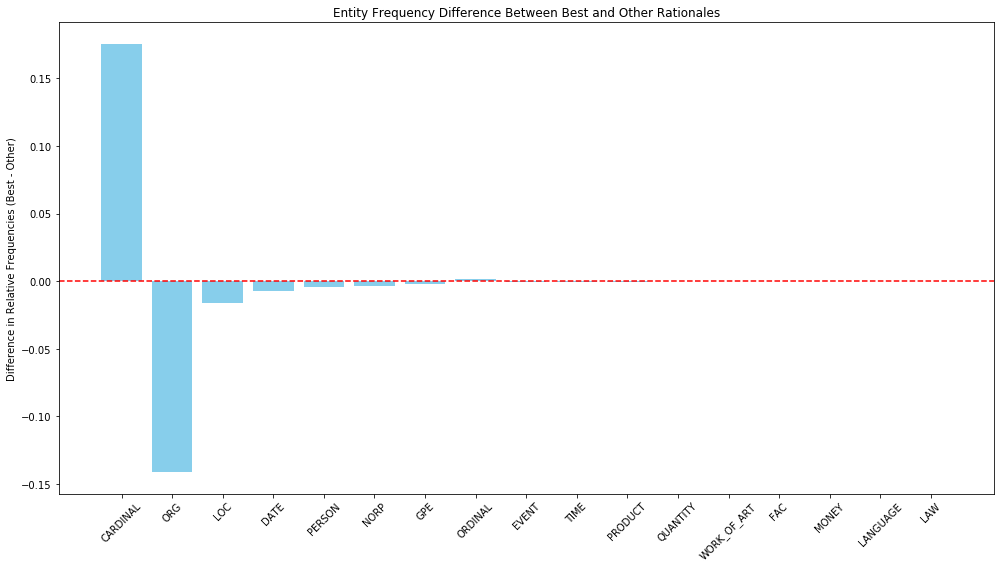

In [152]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Function to count the entities in a list of texts
def count_entities_in_texts(texts):
    entity_counts = Counter()
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):  # Efficiency
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
    return entity_counts

# Calculate entity frequencies for 'best rationales' and 'other rationales'
best_texts = [text for rationale in best_rationales for text in rationales[rationale].tolist()]
best_entity_counts = count_entities_in_texts(best_texts)
total_best = sum(best_entity_counts.values())

other_rationales = set(rationales.columns) - set(best_rationales)
other_texts = [text for rationale in other_rationales for text in rationales[rationale].tolist()]
other_entity_counts = count_entities_in_texts(other_texts)
total_other = sum(other_entity_counts.values())

# Normalize to get relative frequencies
best_frequencies = {entity: count / total_best for entity, count in best_entity_counts.items()}
other_frequencies = {entity: count / total_other for entity, count in other_entity_counts.items()}

# Compute differences
differences = {entity: best_frequencies.get(entity, 0) - other_frequencies.get(entity, 0) for entity in best_frequencies.keys() | other_frequencies.keys()}

# Sort by magnitude of difference for better visualization
sorted_entities = sorted(differences.keys(), key=lambda entity: abs(differences[entity]), reverse=True)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(sorted_entities, [differences[entity] for entity in sorted_entities], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel("Difference in Relative Frequencies (Best - Other)")
plt.title("Entity Frequency Difference Between Best and Other Rationales")
plt.tight_layout()
plt.show()


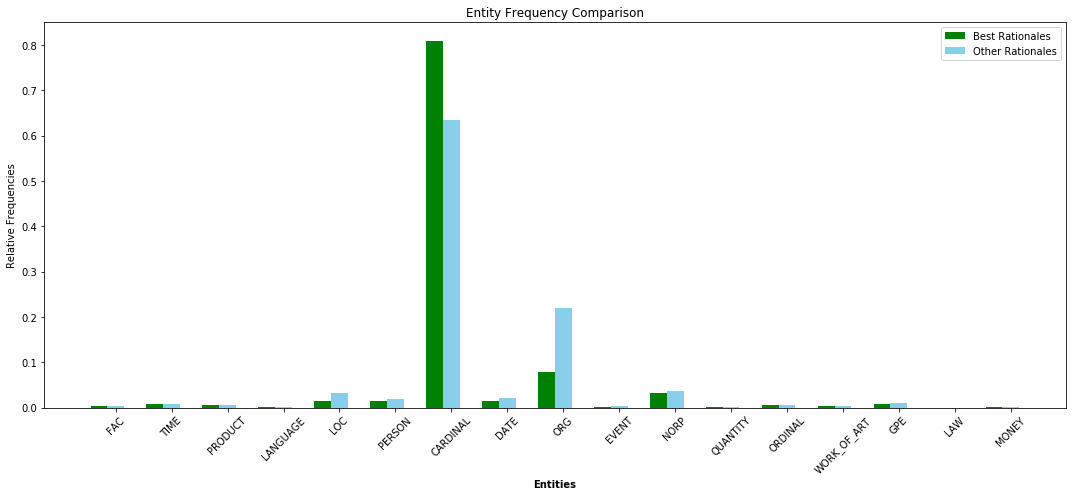

In [153]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Function to count the entities in a list of texts
def count_entities_in_texts(texts):
    entity_counts = Counter()
    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
    return entity_counts

# Calculate entity frequencies for 'best rationales'
best_texts = [text for rationale in best_rationales for text in rationales[rationale].tolist()]
best_entity_counts = count_entities_in_texts(best_texts)
total_best = sum(best_entity_counts.values())
best_frequencies = {entity: count / total_best for entity, count in best_entity_counts.items()}

# Calculate entity frequencies for 'other rationales'
other_texts = [text for rationale in other_rationales for text in rationales[rationale].tolist()]
other_entity_counts = count_entities_in_texts(other_texts)
total_other = sum(other_entity_counts.values())
other_frequencies = {entity: count / total_other for entity, count in other_entity_counts.items()}

# Visualization
entities = list(set(best_entity_counts.keys()) | set(other_entity_counts.keys()))
best_vals = [best_frequencies.get(entity, 0) for entity in entities]
other_vals = [other_frequencies.get(entity, 0) for entity in entities]

barWidth = 0.3
r1 = np.arange(len(entities))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(15, 7))
plt.bar(r1, best_vals, width=barWidth, color='green', label='Best Rationales')
plt.bar(r2, other_vals, width=barWidth, color='skyblue', label='Other Rationales')

plt.xlabel('Entities', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(entities))], entities, rotation=45)
plt.ylabel("Relative Frequencies")
plt.title("Entity Frequency Comparison")
plt.legend()

plt.tight_layout()
plt.show()
